## What do we want to find out?

* Which types of food have more negative impact on the environment?
* What types of food production should be encouraged to consume nutritious diet in a sustainable way?
* Which stage of food production contributes more to the greenhouse gas emmision?
* Compare carbon footprint of plant-based and animal-based foods?

In [233]:
import pandas as pd

df = pd.read_csv('Food_Production.csv')
df.reset_index(drop=True, inplace=True)
df.head(3)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),diet,type
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PB,Food
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PB,Food
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PB,Drink


## Info on data

* 1st column: Food Products
* 2nd to 9th column: kgCO2e per kg of product - cross different stages in the lifecycle of food production

**Eutrophication**: *the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem.*

In [234]:
# Check for missing and duplicate data
print("Duplicated rows: ", df.duplicated().sum())
missing_info = pd.DataFrame({"Dtype": df.dtypes,
                             "Missing": df.isna().sum(),
                             "Missing%": (df.isnull().sum()/df.shape[0])*100})
missing_info

Duplicated rows:  0


,Dtype,Missing,Missing%
Food product,object,0,0.000000
Land use change,float64,0,0.000000
Animal Feed,float64,0,0.000000
Farm,float64,0,0.000000
Processing,float64,0,0.000000
Transport,float64,0,0.000000
Packging,float64,0,0.000000
Retail,float64,0,0.000000
Total_emissions,float64,0,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),float64,10,23.255814


## Clean DataFrame

First, sort out column names. Focus on first 8 columns for now.

In [235]:
df = df.rename(columns=lambda x: x.replace(' ','_').lower() \
    if df.columns.get_loc(x) <= 8 else x)

## Total emission ranked  

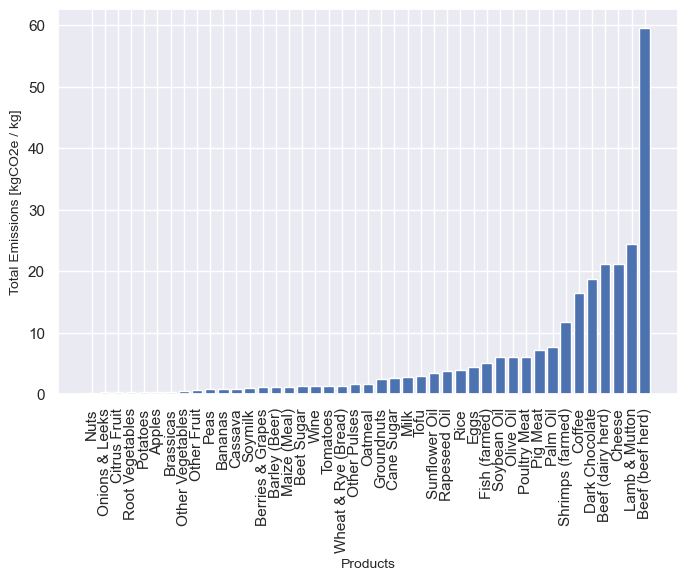

In [236]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of ordered products from least to most emissions
product_ordered = list(df.sort_values(by='total_emissions').food_product)

# Bar chart of total emissions
plt.figure(figsize=(8,5))
plt.bar(range(df.shape[0]), np.sort(df.total_emissions.values))
#plt.bar(range(df.shape[0]), df.total_emissions)
plt.xlabel('Products', fontsize=10)
plt.xticks(range(df.shape[0]), product_ordered,rotation=90)
plt.ylabel('Total Emissions [kgCO2e / kg]', fontsize=10)
plt.show()

### Bubble chart of total emissions (split by diet and filtered by product type)

In [237]:
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Define a function to create and update the bubble chart
def update_bubble_chart(selected_category):
    if selected_category == 'All':
        filtered_df = df
    else:
        filtered_df = df[df['type'] == selected_category]
    
    fig = px.scatter(filtered_df, x="food_product", y="total_emissions",
                 size="total_emissions", size_max=50, color="diet", 
                 hover_name="food_product")

    fig.update_layout(
        title='Bubble Chart',
        xaxis_title='Products',
        yaxis_title='Total Emissions [kgCO2e / kg]')

    fig.update_xaxes(showticklabels=False)
    
    fig.show()

# Create a dropdown widget for filtering
category_dropdown = widgets.Dropdown(
    options=['All'] + df['type'].unique().tolist(),
    value='All',
    description='type:')

# Define an interactive function using ipywidgets' interact
interact(update_bubble_chart, selected_category=category_dropdown)

interactive(children=(Dropdown(description='type:', options=('All', 'Food', 'Drink', 'Oil'), value='All'), Out…

<function __main__.update_bubble_chart(selected_category)>

* Plant-based food have noticeably lower eCO2 emission associted to them
* Beef is over twofold worse than the next product on the list

## Looking at the impact of different stages of food production

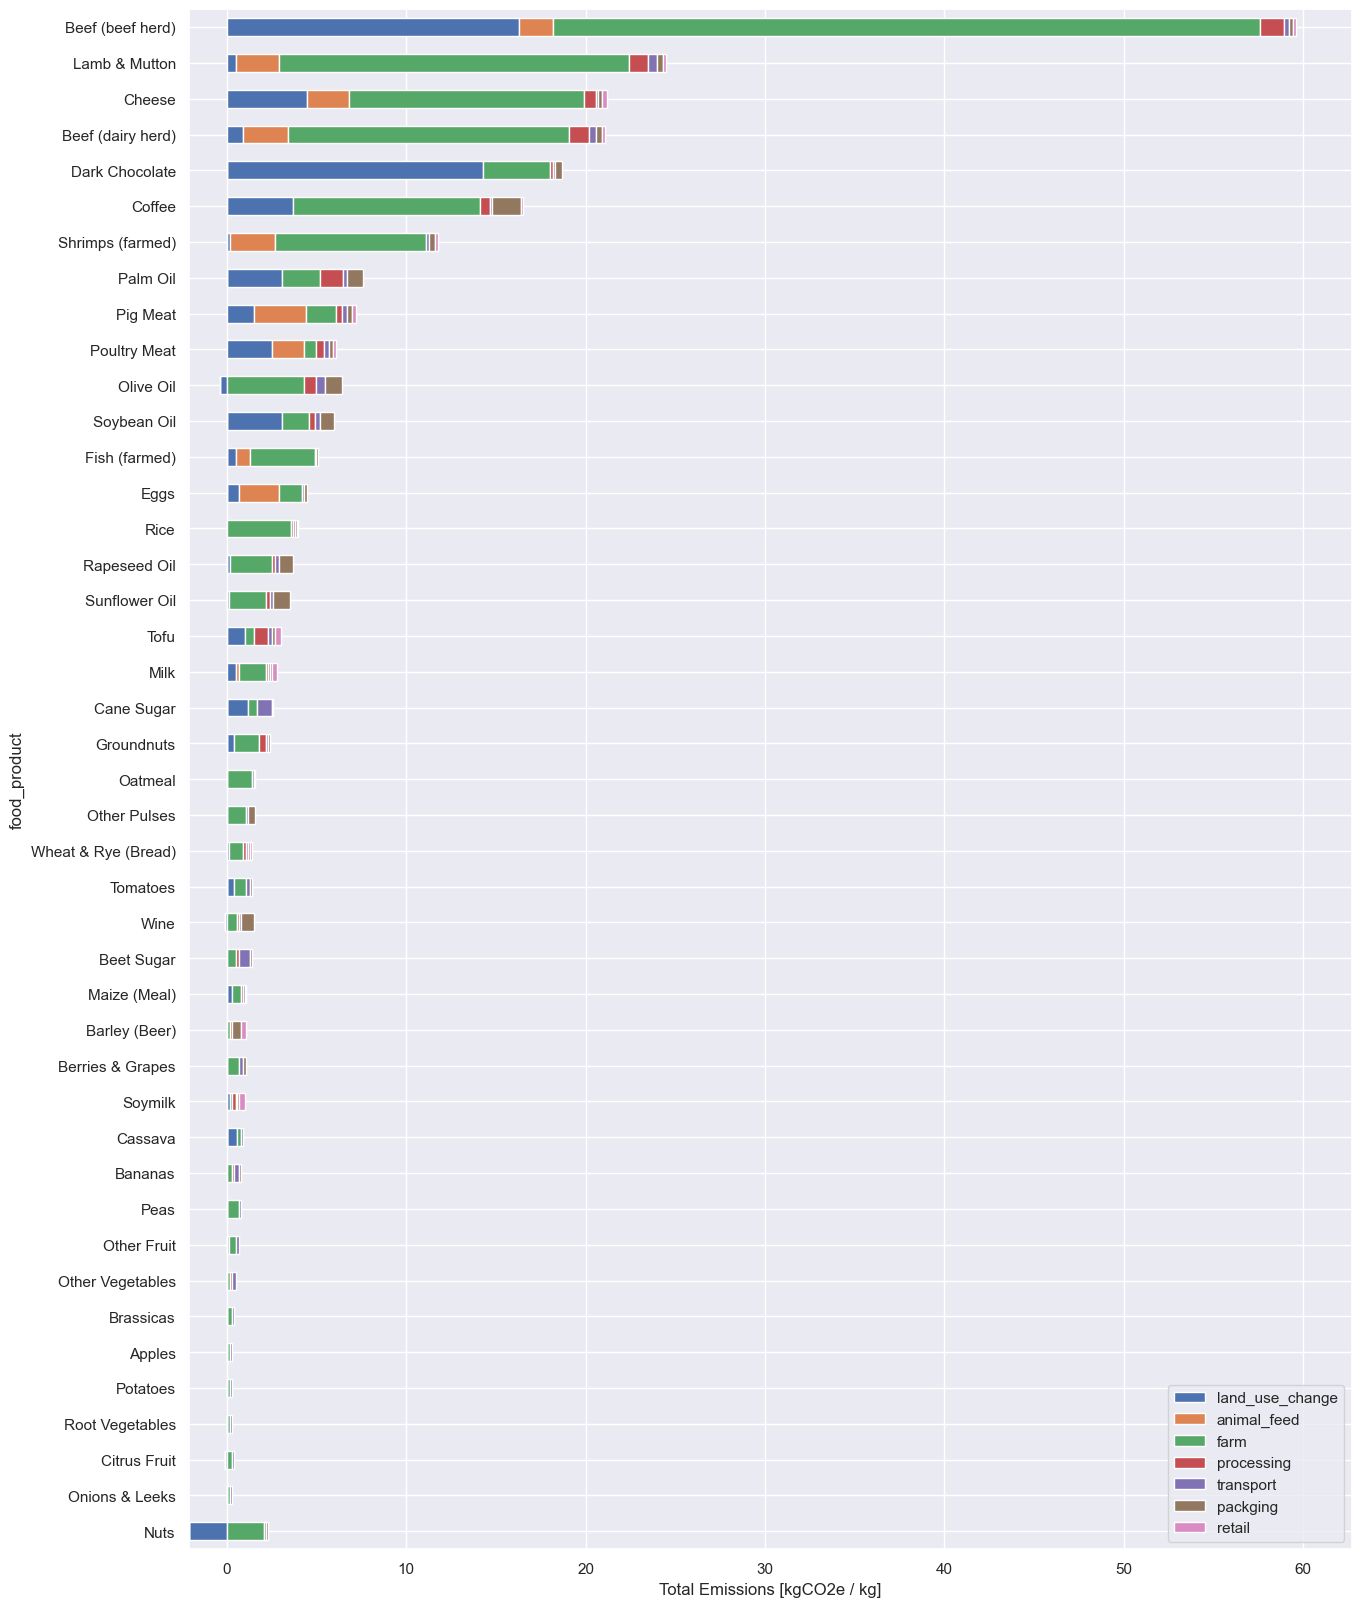

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create temporary DataFrame sorted by `total_emissions` with the first 8 columns
temp_df = df.sort_values(by="total_emissions", ascending=True).iloc[:,:8]

# Create figure and plot
fig, ax = plt.subplots(figsize=(15,20))
temp_df.set_index('food_product').plot(kind='barh', stacked=True, ax=ax)
plt.xlabel("Total Emissions [kgCO2e / kg]")
plt.show()

#### Takeouts

* Farming appears to be the dominating contributor of eCO2

* Some exceptions:
    * Chocolate's emissions are dominated by "land use change" - deforastation?
    * Pig meat and eggs' emissions are dominated by "animal feed"

* The processing and distribution are neglectable compared to the food type

* Need to look in to why Nuts have a "land use change" value corresponding to eCO2 absorption 

## Let's compare the land usage and eCO2 emissions (per 1000 kcal)
Unfortunately the dataset is partly incomplete, so we'll have focus on the data we do have. There isn't enough information to be able to estimate the values of NaNs. And looking for relevant data in a different dataset is likely to lead to inconsistencies due to assumptions, sources and methods used. 

In [239]:
# To catch warning with text font for legend
import warnings
warnings.filterwarnings('ignore')

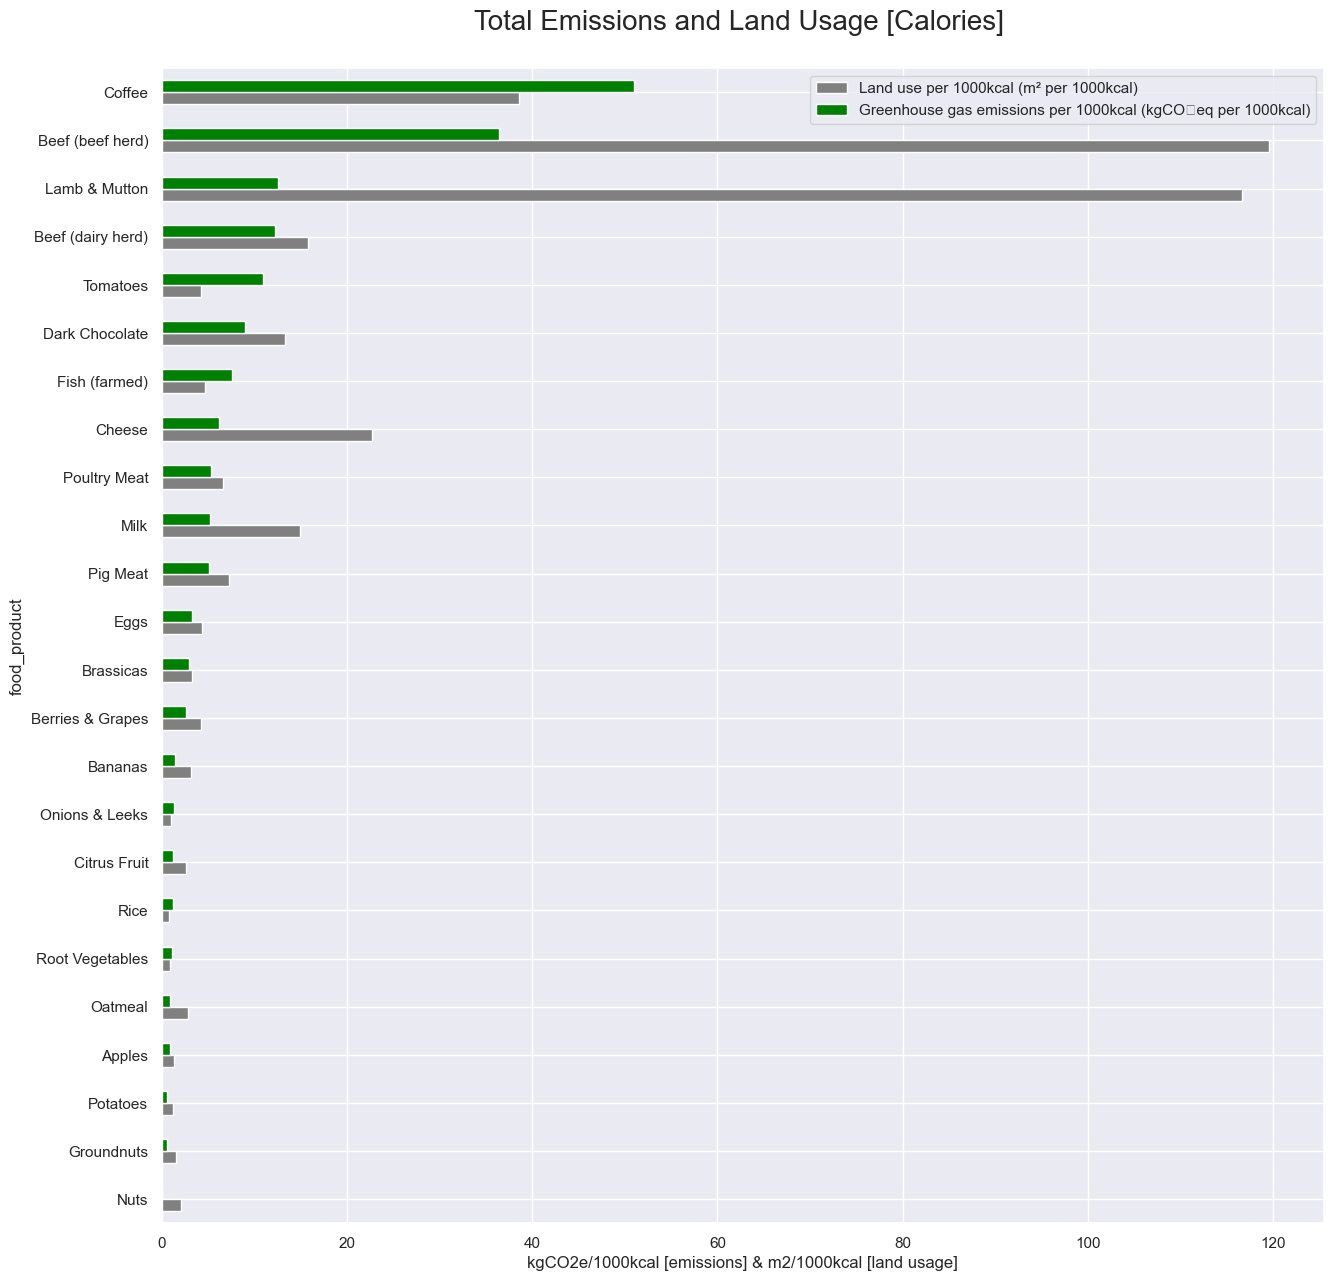

In [240]:
# Create temporary DataFrame sorted by and containing `Greenhouse gas emissions per 1000kcal` without NaNs
temp_df = df.dropna() \
    .sort_values(by='Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', ascending= True) \
    [['food_product', \
      'Land use per 1000kcal (m² per 1000kcal)', \
      'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']]

# Create figure and plot
fig, ax = plt.subplots(figsize=(15,15))
sns.set()
temp_df.set_index('food_product').plot(kind='barh', stacked=False, ax=ax, color=["gray","green"])
plt.xlabel("kgCO2e/1000kcal [emissions] & m2/1000kcal [land usage]")
plt.title("Total Emissions and Land Usage [Calories] \n", size=20)
plt.show()

## Let's compare the land usage and eCO2 emissions (per 100g protein)


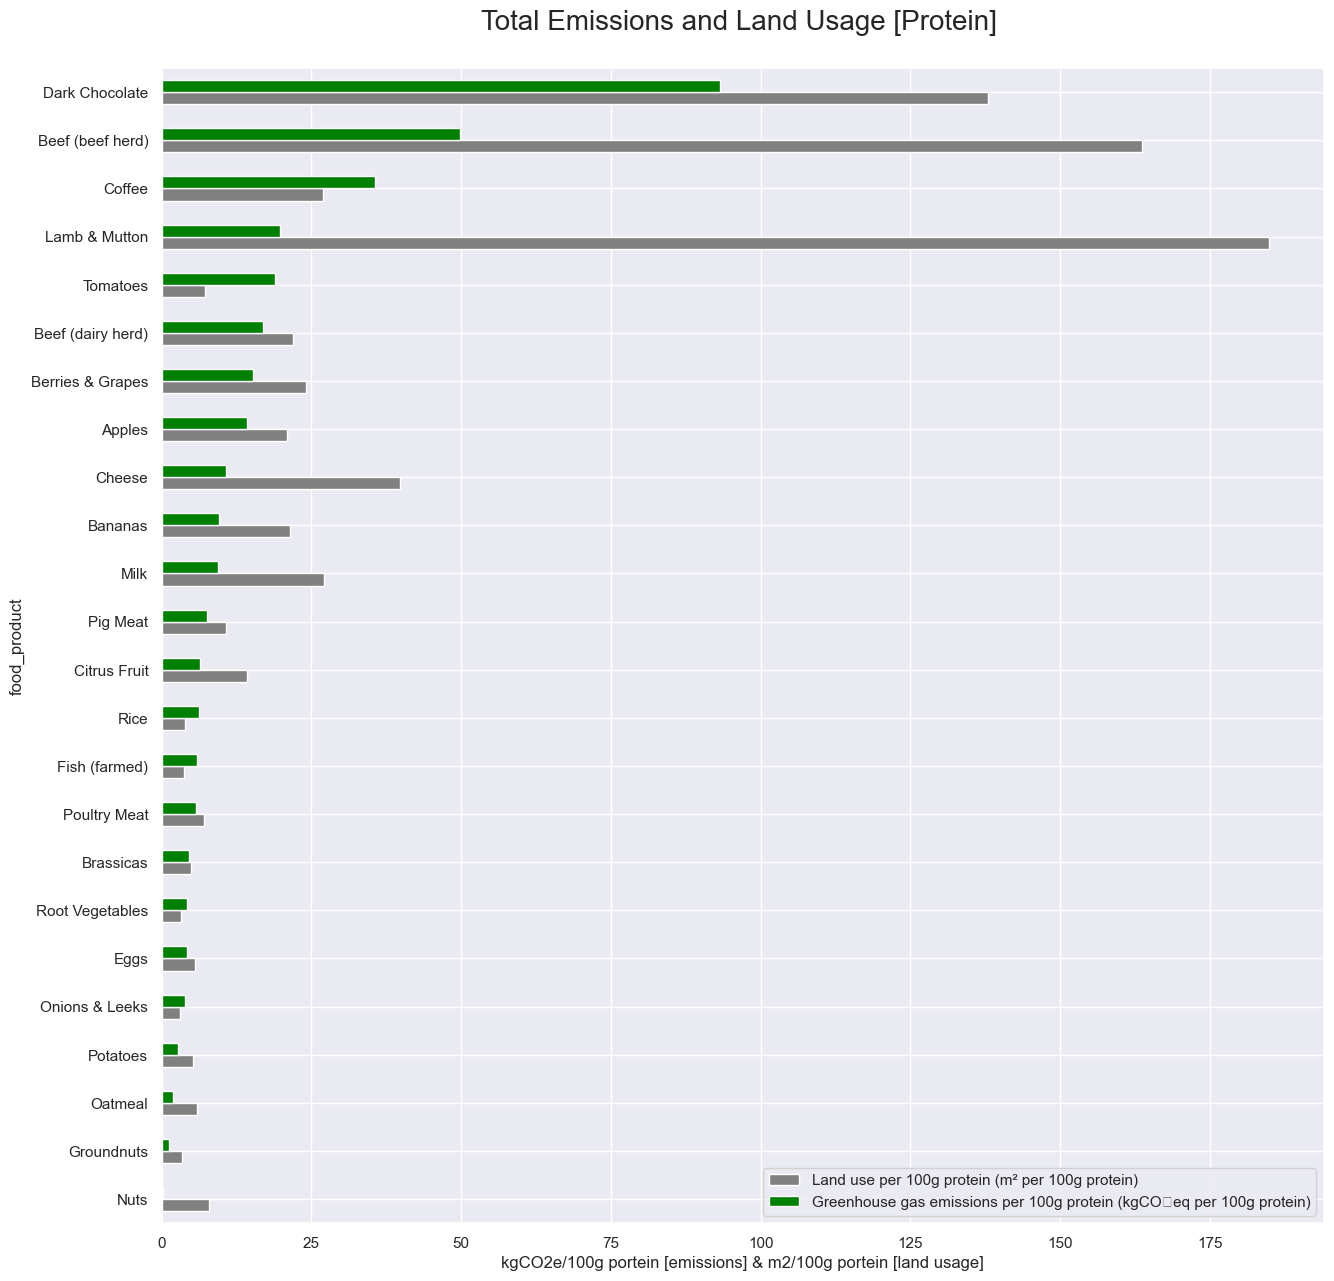

In [241]:
# Create temporary DataFrame sorted by and containing `Greenhouse gas emissions per 1000kcal` without NaNs
temp_df = df.dropna() \
    .sort_values(by='Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', ascending= True) \
    [['food_product', \
      'Land use per 100g protein (m² per 100g protein)', \
      'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]

# Create figure and plot
fig, ax = plt.subplots(figsize=(15,15))
sns.set()
temp_df.set_index('food_product').plot(kind='barh', stacked=False, ax=ax, color=["gray","green"])
plt.xlabel("kgCO2e/100g portein [emissions] & m2/100g portein [land usage]")
plt.title("Total Emissions and Land Usage [Protein] \n", size=20)
plt.show()

In [ ]:
# Reset warnings
warnings.filterwarnings('default')

## What if we focus on products considered as a source of protein?

In [257]:
protein_source = ["Nuts","Groundnuts","Eggs","Poultry Meat","Fish (farmed)", \
                  "Pig Meat","Beef (dairy herd)","Lamb & Mutton","Beef (beef herd)"]

protein_source_df = df[df["food_product"] \
    .isin(protein_source)] \
    .sort_values(by='Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', ascending= True) \
    .iloc[:,[0,11,13,16,19,21]]

protein_source_df

,food_product,Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 100g protein (liters per 100g protein),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per 100g protein (liters per 100g protein)
11,Nuts,11.726883,2531.414574,0.263319,7.936314,140777.587300
12,Groundnuts,5.401070,707.524828,1.233766,3.479756,23605.003820
40,Eggs,19.610671,520.638068,4.208724,5.650685,16206.470800
37,Poultry Meat,28.117783,381.062356,5.698614,7.055427,8185.854503
41,Fish (farmed),103.100197,1618.636264,5.976759,3.687788,18229.423370
36,Pig Meat,47.206428,1109.888752,7.608158,10.729295,41327.194070
34,Beef (dairy herd),185.050659,1375.025329,16.869301,21.904762,60691.590680
35,Lamb & Mutton,48.540730,900.949525,19.850075,184.812594,70927.036480
33,Beef (beef herd),151.158475,727.783350,49.889669,163.595787,17418.505520


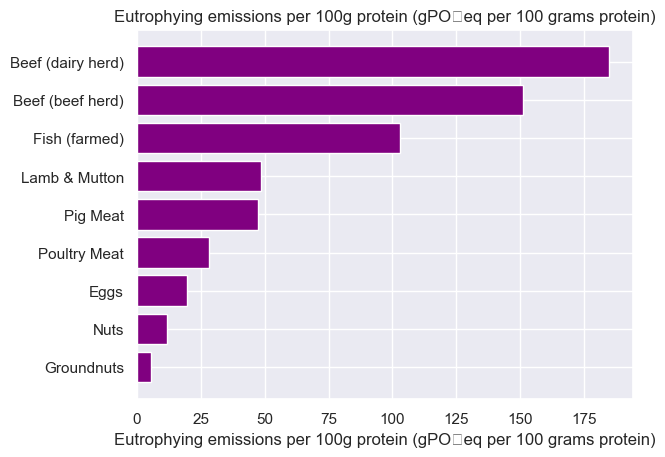

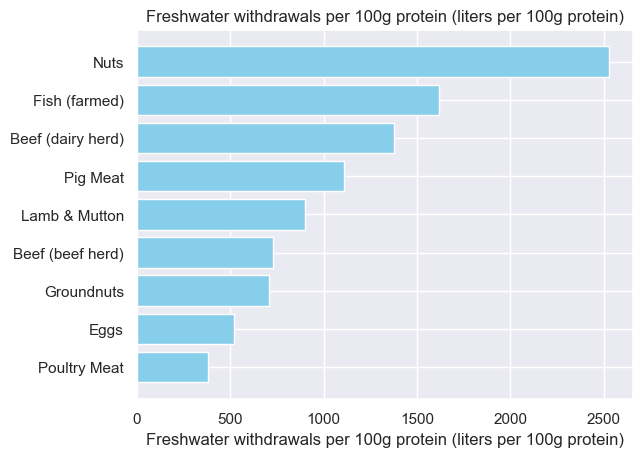

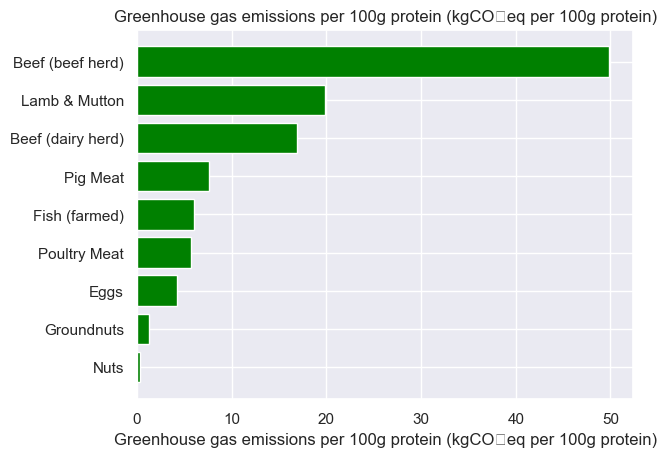

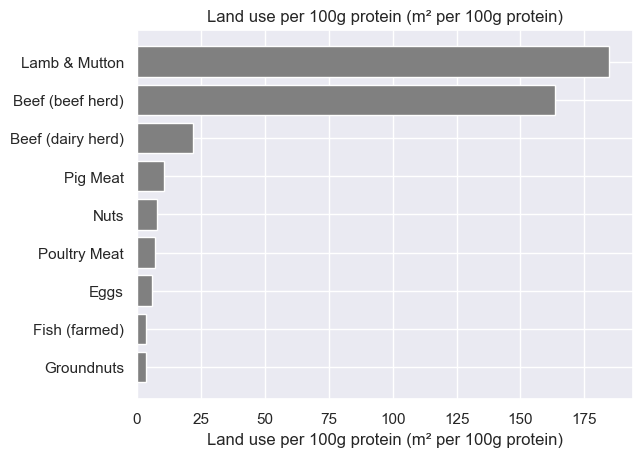

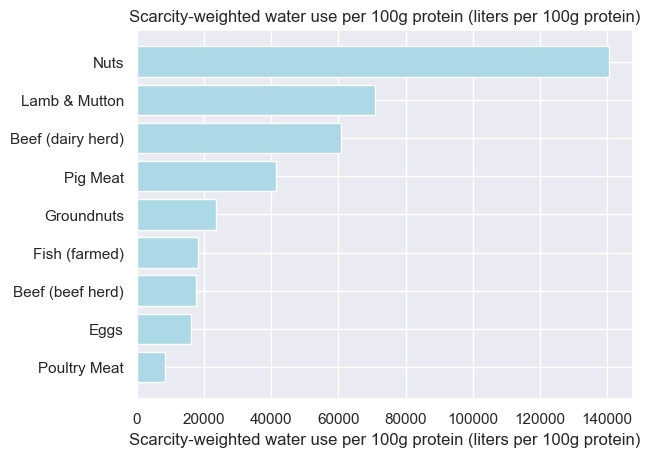

In [285]:
columns_to_plot = protein_source_df.columns.difference(['food_product'])
colors = ['purple','skyblue','green','gray','lightblue']
colors_counter = 0

# Create horizontal bar charts for each column
for column in columns_to_plot:
    temp_df = protein_source_df.sort_values(by=column, ascending=True)
    
    fig, ax = plt.subplots()
    #plt.figure(figsize=(8, 4))
    plt.barh(temp_df['food_product'], temp_df[column], color=colors[colors_counter])
    plt.xlabel(column)
    plt.title(f'{column}')
    
    plt.show()
    
    colors_counter += 1


* **Unfortunetly, there is no data for Tofu which is a high source of protein in a plant-based diet**